In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np  
import config
from myfunc import timer
from myfunc import DirMan
import matplotlib
import geopandas as gpd
from pylab import rcParams
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as colors

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera04/zhwei/xionghui/bedrock/run/{resolution}/'
post_data_path = '/tera04/zhwei/xionghui/bedrock/'
shp_path = '/tera04/zhwei/xionghui/bedrock/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'grid.linewidth': 0.2,
          'font.size': 25,
          'legend.fontsize': 18,
          'legend.frameon': False,
          'xtick.labelsize': 30,
          'xtick.direction': 'out',
          'ytick.labelsize': 30,
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

df = pd.read_csv(f'{data_path}csv/Global.csv')
shp = gpd.read_file(shp_path+'World_CN/ne_10m_admin_0_countries_chn.shp')

In [78]:
df_area = df.copy()
df1 = pd.DataFrame()
df1['Sr'] = df_area.groupby('Continent')['Sr'].mean()
df1['Sbedrock'] = df_area.groupby('Continent')['Sbedrock'].mean()
# df1['Ssoil'] = df_area.groupby('Continent')['Ssoil'].mean()
df1['Area'] = df_area.groupby('Continent')['Area'].sum()

df1['Continent'] = df1.index
df1 = df1.sort_values(by='Area', ascending=False)
print(df1)
# df2 = df1.set_index('Continent').transpose()
# df2['name'] = df2.index
# print(df2)

                       Sr    Sbedrock          Area      Continent
Continent                                                         
Asia           193.790012   90.453844  6.118740e+12           Asia
Africa         298.666314  190.386979  4.540072e+12         Africa
South America  320.085247  208.718369  3.675738e+12  South America
North America  210.625560  119.233203  2.786138e+12  North America
Europe         185.469256   74.560369  1.582207e+12         Europe
Oceania        197.693148  102.052837  1.208023e+12        Oceania
Antarctica      21.499716   11.866321  2.973036e+07     Antarctica


                       Sr    Sbedrock         Area      Continent
Continent                                                        
Asia           193.790012   90.453844  6118.739677           Asia
Africa         298.666314  190.386979  4540.071771         Africa
South America  320.085247  208.718369  3675.738265  South America
North America  210.625560  119.233203  2786.137696  North America
Europe         185.469256   74.560369  1582.206816         Europe
Oceania        197.693148  102.052837  1208.022726        Oceania
                                   Sr    Sbedrock         Area  \
Subregion                                                        
South America              319.390595  208.170724  3617.471891   
Eastern Europe             147.431458   40.035177  3109.308880   
Middle Africa              281.110265  168.326445  2265.934442   
Northern America           178.964416   90.491238  1934.032198   
Eastern Asia               168.373503   70.068709  1456.304144   
South-East

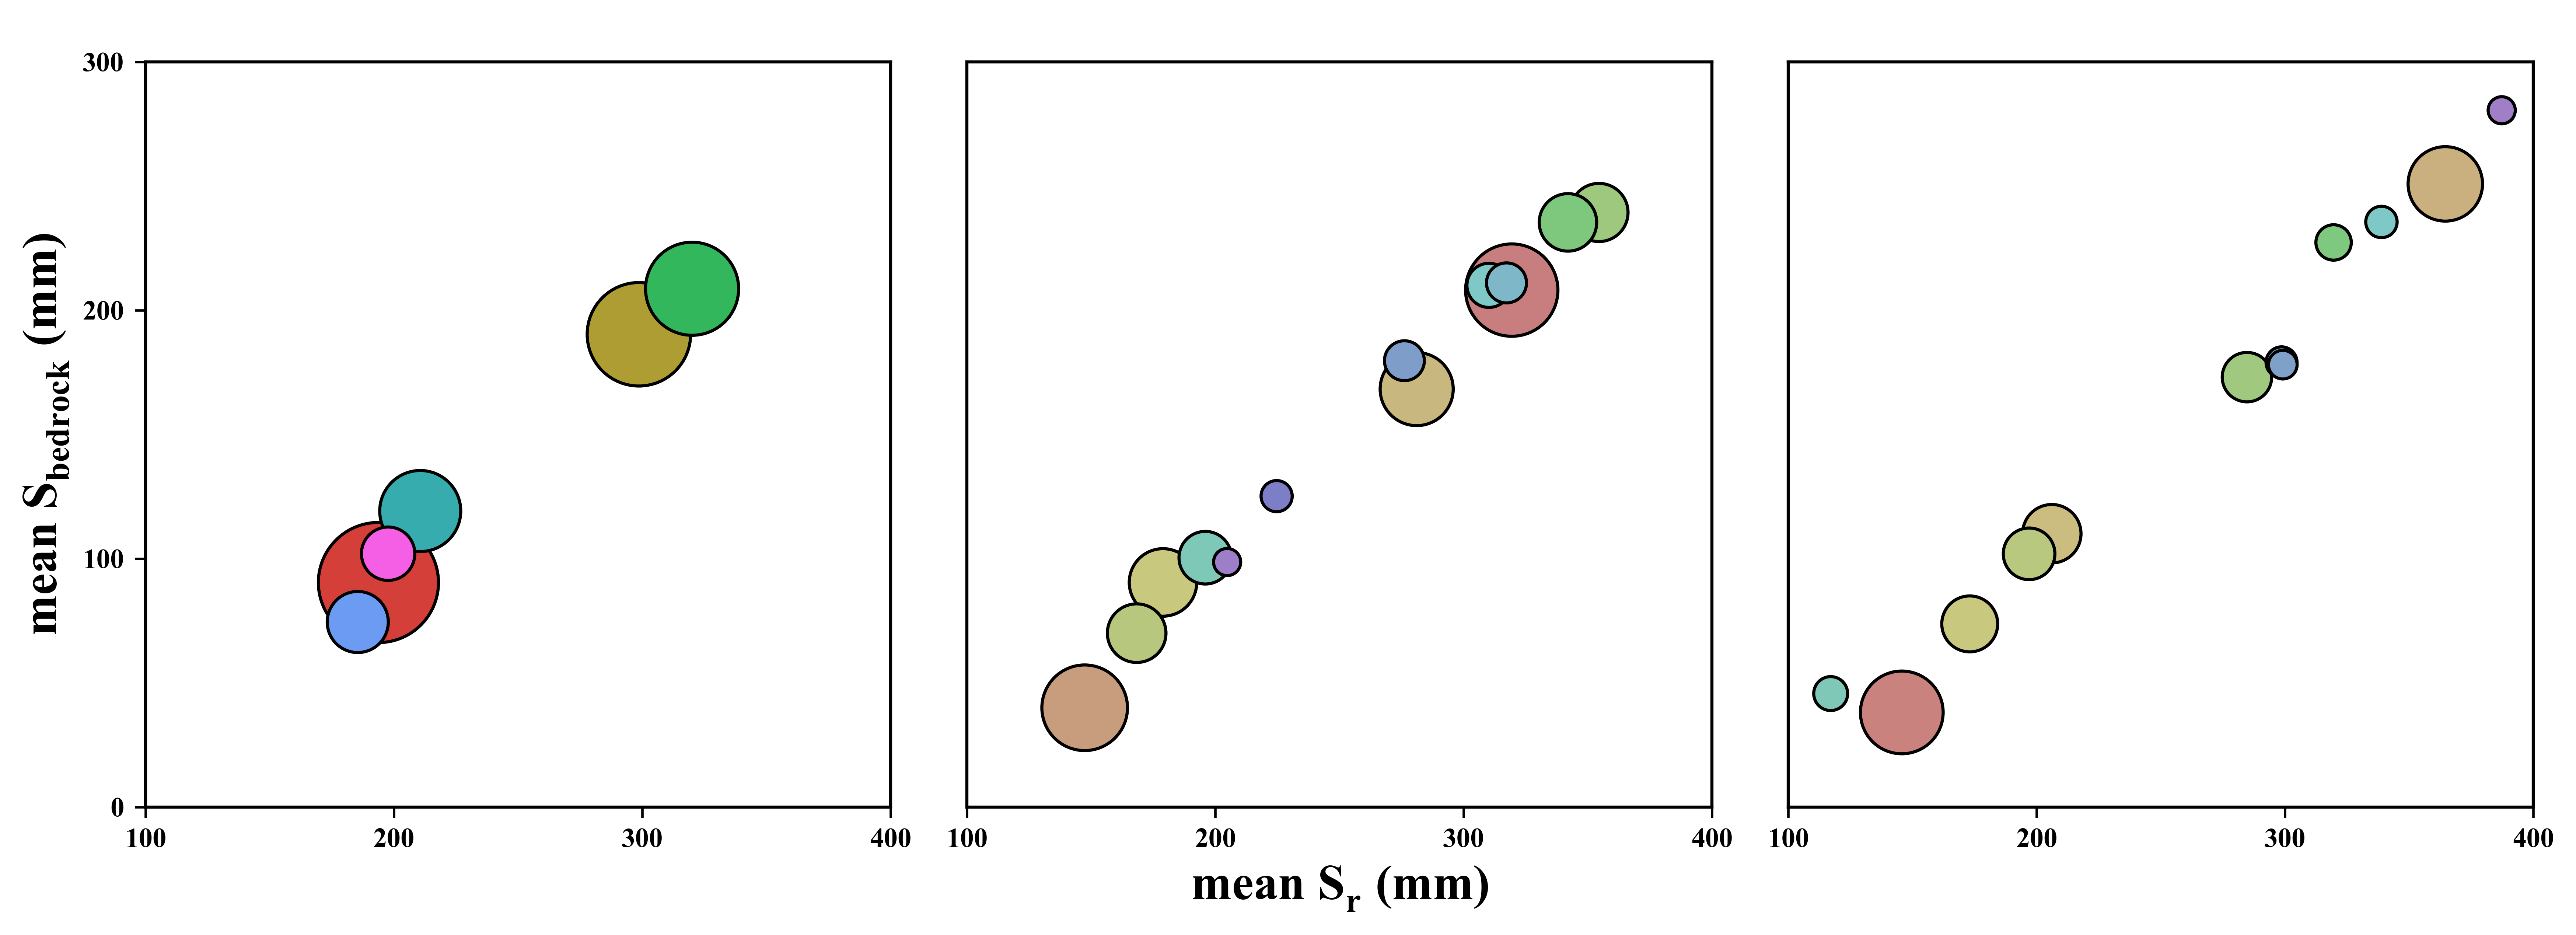

In [80]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=600) 
fig.subplots_adjust(left=0, right=1, 
                bottom=0, top=1, wspace=-0.35) 
gs = GridSpec(1, 3, figure=fig)

ax.set_axis_off()

ax1 = fig.add_subplot(gs[0, 0])
df_area = df.copy()
df1 = pd.DataFrame()
df1['Sr'] = df_area.groupby('Continent')['Sr'].mean()
df1['Sbedrock'] = df_area.groupby('Continent')['Sbedrock'].mean()
df1['Area'] = df_area.groupby('Continent')['Area'].sum()/(1e9)
df1 = df1[df1['Area']>300]
df1['Continent'] = df1.index
df1 = df1.sort_values(by='Area', ascending=False)
print(df1)
x = df1['Sr']
y = df1['Sbedrock']
size = df1['Area']/4
fill = df1['Area']
rgb_list = ['#D43F3A', '#ae9d32', '#32b75c', '#36acae', '#6c9bf4', '#f55fe5']
scatter = ax1.scatter(x, y, s=size, linewidths=1,
                    edgecolors="k", color=rgb_list)
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1)  

ax1.set_xlim(100, 400)  
ax1.set_ylim(0, 300)  
ax1.set_xticks(np.arange(100,500,100))
ax1.set_yticks(np.arange(0,400,100))
ax1.set_xticklabels(np.arange(100,500,100), fontsize=9, fontweight='bold')
ax1.set_yticklabels(np.arange(0,400,100), fontsize=9, fontweight='bold')
# ax1.set_xlabel('mean $S_{{r}}$ (mm)', fontsize=16, fontweight='bold')
ax1.set_ylabel('mean $S_{{bedrock}}$ (mm)', fontsize=16, fontweight='bold')
# ax1.set_title('Continent')


ax2 = fig.add_subplot(gs[0, 1])

df_area = df.copy()
df1 = pd.DataFrame()
df1['Sr'] = df_area.groupby('Subregion')['Sr'].mean()
df1['Sbedrock'] = df_area.groupby('Subregion')['Sbedrock'].mean()
df1['Area'] = df_area.groupby('Subregion')['Area'].sum()/(1e9)
df1 = df1[df1['Area']>300]
df1['Subregion'] = df1.index
df1 = df1.sort_values(by='Area', ascending=False)
print(df1)
x = df1['Sr']
y = df1['Sbedrock']
size = df1['Area']/4
fill = df1['Area']

rgb_list = ['#C87E7E', '#C89D7E', '#C8B77E', '#C8C87E', 
           '#B7C87E', '#9DC87E', '#7EC87E', '#7EC8B7', 
           '#7EC8C8', '#7EB7C8', '#7E9DC8','#7E7EC8'
           , '#9D7EC8']

scatter = ax2.scatter(x, y, s=size, linewidths=1,
                    edgecolors="k", color=rgb_list)

for spine in ax2.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1)  

ax2.set_xlim(100, 400)  
ax2.set_ylim(0, 300)  
ax2.set_xticks(np.arange(100,500,100))
ax2.set_yticks([]) 
ax2.set_xticklabels(np.arange(100,500,100), fontsize=9, fontweight='bold')
ax2.set_xlabel('mean $S_{{r}}$ (mm)', fontsize=16, fontweight='bold')
# ax2.set_ylabel('mean $S_{{bedrock}}$ (mm)', fontsize=16, fontweight='bold')






ax3 = fig.add_subplot(gs[0, 2])

df_area = df.copy()
df1 = pd.DataFrame()
df1['Sr'] = df_area.groupby('Sovereignt')['Sr'].mean()
df1['Sbedrock'] = df_area.groupby('Sovereignt')['Sbedrock'].mean()
df1['Area'] = df_area.groupby('Sovereignt')['Area'].sum()/(1e9)
df1 = df1[df1['Area']>300]
df1['Sovereignt'] = df1.index
df1 = df1.sort_values(by='Area', ascending=False)
print(df1)
x = df1['Sr']
y = df1['Sbedrock']
size = df1['Area']/4
fill = df1['Area']

rgb_list = ['#CA827F', '#CAB07F', '#CABD7F', '#C8C87F', 
           '#B8C87F', '#A0C87F', '#7FC87F', '#7FC8B8', 
           '#7FC8C8','#7FB8C8', '#7FA0C8', '#7F7FC8',
           '#A07FC8', '#B87FC8']

scatter = ax3.scatter(x, y, s=size, linewidths=1,
                    edgecolors="k", color=rgb_list)

for spine in ax3.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1)  

ax3.set_xlim(100, 400)  
ax3.set_ylim(0, 300)  
ax3.set_xticks(np.arange(100,500,100))
ax3.set_yticks([])  
ax3.set_xticklabels(np.arange(100,500,100), fontsize=9, fontweight='bold')
# ax3.set_xlabel('mean $S_{{r}}$ (mm)', fontsize=16, fontweight='bold')


ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')


# 6. 设置透明背景
fig.patch.set_alpha(0)  # 设置整个图表的背景透明
# 7. 显示图表
plt.tight_layout()  # 调整布局
plt.show()

In [8]:
def plot_bar(column):
    base_hist = (ggplot(df2, aes(x=df2['name'],y=df2[column], fill=df2['name'])) +
                geom_col(stat="identity", position="dodge")+
                theme_matplotlib()+
                # scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl') +
                theme(
                    text=element_text(size=13, color="black"),
                    plot_title=element_text(size=15),
                    aspect_ratio=1.15,
                    figure_size=(5, 5)
                )+
                ylim(0, 400)+  
                labs(x=None, y="mean value (mm)")+
                guides(fill=False)+
                scale_fill_manual(values=rgb_list)
                # ggtitle(column)
                )
        # base_hist.save(f'{fig_path}/h2_{column}.png')
    return base_hist


Africa
Continent        Africa          Asia        Europe  North America  \
Sbedrock   2.118155e+02  8.888828e+01  8.253624e+01   1.257063e+02   
Area       3.196046e+12  5.765678e+12  1.350123e+12   2.355786e+12   

Continent       Oceania  South America      name  
Sbedrock   9.344327e+01   2.166281e+02  Sbedrock  
Area       9.871894e+11   2.435516e+12      Area  


/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_col : Removed 1 rows containing missing values.


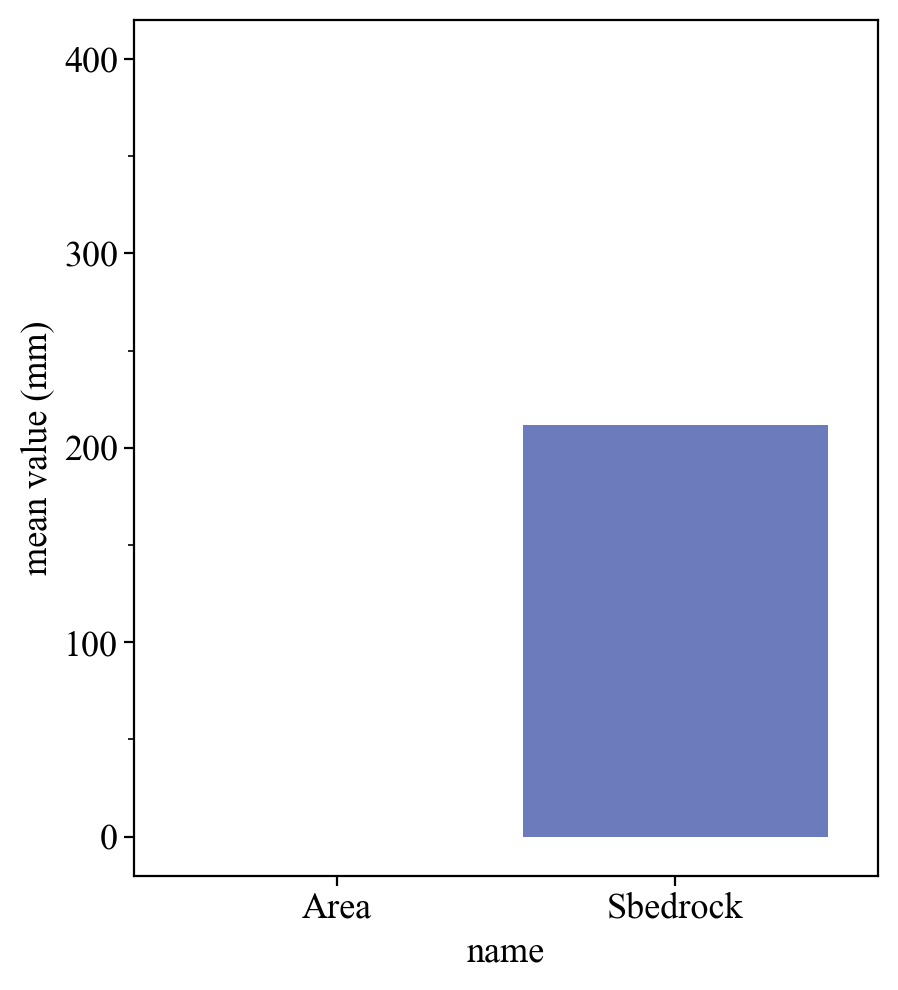

<Figure Size: (500 x 500)>

In [5]:
rgb_list = ['#ed4a69', '#6c7bbc']
cmap = colors.ListedColormap(rgb_list)

column_list = ['Africa','Asia','Australia','Europe','North America','Oceania','South America']
plot_bar(column_list[0])